# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 15.45 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (51/51), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

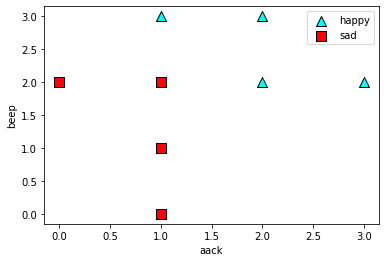

In [4]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [11]:
def step(x):
    ## TODO ##
    # implement step function
    if x < 0:
      output = 0
    else:
      output = 1
    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output = features @ weights + bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output_1 = score(weights,bias,features)
    output = step(output_1)
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    pred = prediction(weights,bias,features)
    if pred == label:
      output = 0
    else:
      output = abs(score(weights,bias,features))
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [16]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    pred = prediction(weights,bias,features) 
    error = label - pred
    for i in range(len(weights)):
      weights[i] += error*learning_rate*features[i]
    #weights += learning_rate*error@features
    bias += error*learning_rate
    return weights, bias

### Running the perceptron algorithm

In [17]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs 
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    for epoch in range(epochs):
      error = mean_perceptron_error(weights, bias, features, labels)
      errors.append(error)
      i = random.randint(0, len(features)-1)
      weights, bias = perceptron_trick(weights, bias, features[i], labels[i])

    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

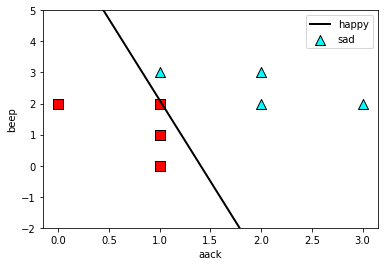

([0.46999999999999953, 0.08999999999999939], -0.6600000000000004)

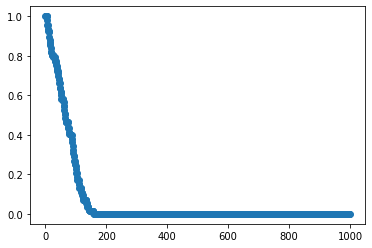

In [23]:
perceptron_algorithm(features, labels,epochs=1000)

### The perceptron algorithm using SKlearn

In [19]:
from sklearn.linear_model import Perceptron
## TODO ##
# Use SKlearn to train perceptron algorithm
clf= Perceptron()
clf.fit(features, labels)

Perceptron()

In [20]:
clf.score(features, labels)

1.0

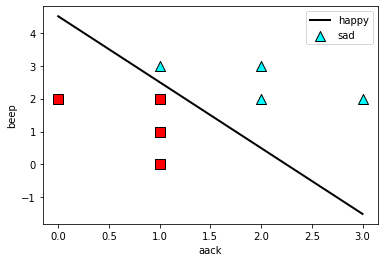

In [21]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()